# Load modules and data

In [13]:
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
plt.ioff()

In [14]:
elastic = np.loadtxt("data/elastic_850eV.dat")
dispersion = np.loadtxt("data/pixel_energy_dispersion.dat")

# Setup plot

In [15]:
fig, (ax_el, ax_disp) = plt.subplots(1, 2, figsize=(8, 3.5))
# plt.ioff()

for ax in (ax_el, ax_disp):
    ax.tick_params(direction="in", top=True, right=True, labelsize=10)

ax_disp.tick_params(labelleft=False, labelright=True)
ax_disp.yaxis.set_label_position("right")

plt.subplots_adjust(top=0.89, bottom=0.12, left=0.1, right=0.9)

## Plot dispersion

In [16]:
plt.sca(ax_disp)
plt.cla()

plt.plot(dispersion[:, 0], dispersion[:, 1], 'o', label="Data")

pars = np.polyfit(dispersion[:, 0], dispersion[:, 1], 2)
x = np.linspace(600, 1400, 20)
plt.plot(x, np.poly1d(pars)(x), label="Polynomial fit")

plt.ylabel("Energy (eV)", fontsize=12, rotation=270, labelpad=15)
plt.xlabel("Pixel", fontsize=12)

# plt.xlim(975, 1090)

plt.legend(fontsize=10, handlelength=1, loc=3)

plt.text(0.95, 0.9, "(b)", ha="right", transform=ax_disp.transAxes, fontsize=12)

Text(0.95, 0.9, '(b)')

### Plot elastic line

In [17]:
plt.sca(ax_el)
plt.cla()

energy = np.poly1d(pars)(elastic[:, 0])

plt.plot(energy-850, elastic[:, 1]/elastic[:, 1].max(), '.', label="Data")
plt.plot(energy-850, elastic[:, 2]/elastic[:, 1].max(), label="Gaussian fit")

plt.ylabel("Intensity (arb. units)", fontsize=12)
plt.xlabel("Energy loss (eV)", fontsize=12)

plt.xlim(850 - np.poly1d(pars)(990), 850 - np.poly1d(pars)(1078))

plt.text(0.95, 0.9, "(a)", ha="right", transform=ax_el.transAxes, fontsize=12)

plt.legend(fontsize=10, handlelength=1, loc=2)

ax2 = plt.twiny(ax_el)
ax2.tick_params(right=False, left=False, bottom=False, direction="in")
plt.xlim(990, 1078)
plt.xlabel("Pixel", fontsize=12)

Text(0.5, 0, 'Pixel')

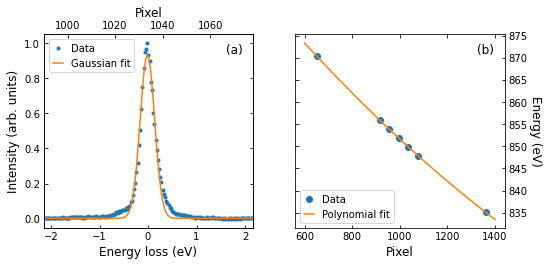

In [18]:
plt.show()